In [24]:
from google.colab import drive

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [25]:
# Request access to drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
# Load the dataset
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/BERTopic/preprocessed_genai_llm_subset.csv')

dataset

,job_id,company_name,title,description,original_listed_time,expiry,cleaned_description,cleaned_title
0,3784120102,OTB English,Artificial Intelligence Engineer Intern - Chatbot,Company DescriptionOTB English offers business...,2024-04-12 03:56:31,2024-05-12 03:56:31,company descriptionotb english offer business ...,artificial intelligence engineer intern chatbot
1,3848960304,Symbolica AI,Senior Machine Learning Research Engineer,Symbolica is building a new foundation for lar...,2024-04-09 13:33:19,2024-05-09 13:33:19,symbolica building new foundation ai using str...,senior machine learning research engineer
2,3884432812,Ehub Global Inc,Generative AI Engineer,Role: Generative AI Practice LeaderLocation – ...,2024-04-05 20:20:34,2024-05-05 20:20:34,role generative ai practice leaderlocation jer...,generative ai engineer
3,3884830087,Deloitte,AI Solution Architect,The Human Capital Offering Portfolio focuses o...,2024-04-06 02:59:16,2024-05-06 03:16:51,human capital offering portfolio focus helping...,ai solution architect
4,3884918154,LILT,"Manager, Customer Engineering",LILT is the leading AI solution for enterprise...,2024-04-05 19:48:18,2024-05-05 19:48:18,lilt leading ai solution enterprise translatio...,manager customer engineering
...,...,...,...,...,...,...,...,...
253,3905855257,Bloomberg,Senior Search Engineer - Artificial Intelligen...,The Artificial Intelligence group is the centr...,2024-04-19 14:09:20,2024-05-19 14:23:04,artificial intelligence group central engineer...,senior search engineer artificial intelligence...
254,3905873954,Dice,AI Prompt Creator,Dice is the leading career destination for tec...,2024-04-19 00:00:00,2024-05-19 15:31:32,dice leading career destination tech expert ev...,ai prompt creator
255,3906069801,AC Lion Digital Executive Search,"Product Manager, Generative AI","Role: Product Manager, Generative AILocation: ...",2024-04-19 18:08:46,2024-05-19 18:08:46,role product manager generative ailocation rem...,product manager generative ai
256,3906225769,Kits.AI,Music Production Content Creator (Writer or Vi...,About Kits AIKits is a leading platform for vo...,2024-04-19 21:38:00,2024-05-19 21:38:00,kit aikits leading platform ai conversion buil...,music production content creator writer video ...


In [65]:
# Set pandas display options to show full content
pd.set_option('display.max_colwidth', None)

# Display the full description of row 8
print(dataset.iloc[249]['description'])


Today, every organization needs to be digital, powered by data, running in a multi-cloud world, ready to take on anything. Our Consulting team assesses customer’s strategic, organizational and business challenges and uses in-depth industry knowledge to offer technical solutions that apply to future business environment and operational objectives to help our Dell Technologies customers gain market share and increase efficiency.

Join us to do the best work of your career and make a profound social impact as a Generative AI Principal Consultant on our Consulting Team in Round Rock, Texas.

What You’ll Achieve

As a Generative AI Principal Consultant within the Dell organization, aligned to consulting service delivery, you will provide consultative business and technical delivery services for a range of complex customer-facing consulting engagements. Specifically, you will be part of projects providing expertise in the Large Language Model (LLM) and Generative AI space. These projects wil

In [27]:
# Fill missing values in the "description" column with an empty string
dataset["cleaned_description"] = dataset["cleaned_description"].fillna("")

# Ensure all values are strings
dataset["cleaned_description"] = dataset["cleaned_description"].astype(str)

# Combine titles and descriptions into a single column
dataset["combined"] = dataset["cleaned_title"] + " " + dataset["cleaned_description"]

dataset["combined"] = dataset["combined"].fillna("")
dataset["combined"] = dataset["combined"].astype(str)

# Convert combined column to a list
titles = dataset["cleaned_title"]
description = dataset["cleaned_description"]
combined = dataset["combined"].astype(str)

# Preview an entry
print(f"Example combined entry: {dataset['combined'].iloc[0]}")

Example combined entry: artificial intelligence engineer intern chatbot company descriptionotb english offer business english class presentation workshop team american language coach aim give student confidence natural language perform crucial business situation provide dynamic learning environment push student achieve greatness english role descriptionthis remote unpaid internship role artificial intelligence engineer specializing chatbot development ai engineer responsible creating implementing model natural language processing nlp system specific focus voice recognition role involves software development working extensively neural network close collaboration team member qualificationsstrong understanding computer science software developmentexperience working neural network develop nlp systemsexperience working voice recognition voice synthesis projectsexpertise pattern recognition machine learning algorithmsrecent computer science related field student current graduate preferred re

In [28]:
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.85, min_df=2, stop_words='english')

# Fit and transform the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(dataset['combined'])

# Get feature names
terms = tfidf_vectorizer.get_feature_names_out()

In [29]:
# Extract top terms for each document
def get_top_terms(tfidf_matrix, terms, top_n=40):
    top_terms = []
    for row in tfidf_matrix:
        row_data = row.toarray()[0]
        top_indices = row_data.argsort()[-top_n:][::-1]  # Indices of top terms
        top_terms.append([(terms[i], row_data[i]) for i in top_indices])
    return top_terms

top_terms_per_posting = get_top_terms(tfidf_matrix, terms, top_n=10)

# Display top terms for the first posting
print("Top terms for the first posting:")
print(top_terms_per_posting[0])


Top terms for the first posting:
[('student', 0.29905985750249087), ('recognition', 0.2610182462381129), ('voice', 0.23750215881513098), ('internship', 0.18733645328508858), ('chatbot', 0.17799999745539197), ('nlp', 0.16855229416498504), ('natural', 0.16855229416498504), ('intern', 0.1670225242007768), ('english', 0.15776682227703534), ('learning', 0.14531622860273422)]


In [30]:
# Sum TF-IDF scores across all postings
aggregate_scores = np.sum(tfidf_matrix.toarray(), axis=0)

# Pair terms with their aggregate scores
term_scores = list(zip(terms, aggregate_scores))

# Sort terms by score
sorted_term_scores = sorted(term_scores, key=lambda x: x[1], reverse=True)

# Display top 10 terms
print("Top terms across all postings:")
print(sorted_term_scores[:40])


Top terms across all postings:
[('chatbots', 22.005533047313673), ('conversation', 19.163435757971985), ('progress', 14.540649375389917), ('data', 13.357679576866406), ('experience', 13.23713614876226), ('remote', 13.149222412349998), ('teach', 13.048579248773379), ('paypal', 12.777211668295479), ('order', 12.672395526534764), ('join', 12.501427077402923), ('usd', 11.88005289679458), ('software', 11.348422505347102), ('engineer', 11.146489665177354), ('able', 10.781149163217984), ('problem', 10.749145654894903), ('code', 10.480949914232097), ('content', 10.139961097985543), ('capital', 9.900109225575065), ('learning', 9.896460072421657), ('language', 9.879295595043237), ('model', 9.808948643918269), ('coding', 9.24152731338437), ('quality', 9.053382298784303), ('proficient', 8.953377356220274), ('train', 8.906683645747087), ('project', 8.479819006947519), ('research', 8.262495366092098), ('generative', 8.13729492282257), ('solution', 8.029050603012529), ('skill', 8.008644473514583), ('

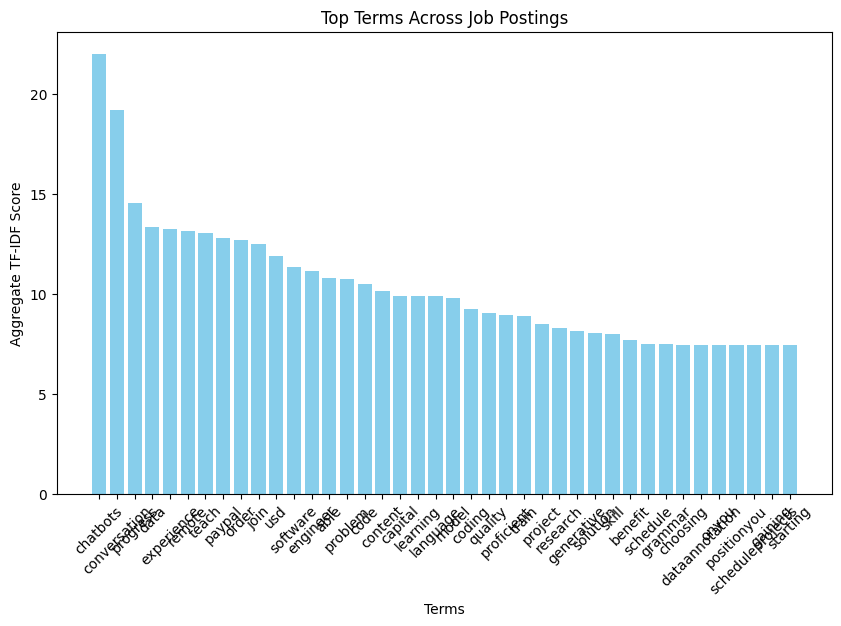

In [31]:
top_n = 40
top_terms = sorted_term_scores[:top_n]
terms, scores = zip(*top_terms)

plt.figure(figsize=(10, 6))
plt.bar(terms, scores, color='skyblue')
plt.xlabel("Terms")
plt.ylabel("Aggregate TF-IDF Score")
plt.title("Top Terms Across Job Postings")
plt.xticks(rotation=45)
plt.show()


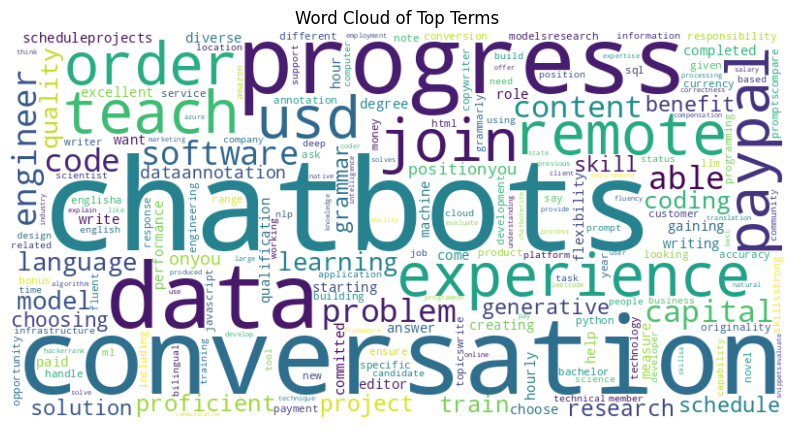

In [32]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(sorted_term_scores))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Top Terms")
plt.show()


In [33]:
terms = tfidf_vectorizer.get_feature_names_out()


In [34]:
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_topics = lda_model.fit_transform(tfidf_matrix)


In [35]:
# Print the top terms per topic
for idx, topic in enumerate(lda_model.components_):
    print(f"Topic {idx}: {[terms[i] for i in topic.argsort()[-10:]]}")


Topic 0: ['content', 'join', 'remote', 'usd', 'progress', 'order', 'paypal', 'teach', 'chatbots', 'conversation']
Topic 1: ['llm', 'development', 'machine', 'technology', 'language', 'generative', 'model', 'learning', 'data', 'experience']
Topic 2: ['sql', 'javascript', 'grammarly', 'chatbots', 'html', 'software', 'code', 'proficient', 'coding', 'problem']
Topic 3: ['relevance', 'international', 'flexible', 'telus', 'freelance', 'guideline', 'map', 'community', 'online', 'task']
Topic 4: ['new', 'applicable', 'status', 'york', 'experience', 'product', 'criminal', 'capability', 'infrastructure', 'capital']


In [45]:
keywords = ["llama", "bert", "cot", "rag", "hallucination", "langchain", "amazon bedrock"]

# Initialize a dictionary to store frequencies
keyword_frequencies = {}

# Count occurrences of each keyword
for keyword in keywords:
    # Use str.contains to check if the keyword exists in each posting
    keyword_frequencies[keyword] = dataset["combined"].str.contains(keyword).sum()

# Convert the dictionary to a DataFrame for easier visualization
keyword_counts_df = pd.DataFrame(list(keyword_frequencies.items()), columns=["Keyword", "Frequency"])

# Sort by frequency (optional)
keyword_counts_df = keyword_counts_df.sort_values(by="Frequency", ascending=False)

# Display the results
print(keyword_counts_df)

          Keyword  Frequency
3             rag         91
1            bert         14
5       langchain          7
0           llama          5
4   hallucination          4
2             cot          2
6  amazon bedrock          2


In [46]:
# Check if specific terms are present in the dataset
search_terms = ["LLaMA", "BERT", "CoT", "RAG", "hallucination", "LangChain", "Amazon Bedrock"]

# Initialize results
term_presence = {}

# Search in the combined column
for term in search_terms:
    term_presence["RAG"] = dataset["combined"].str.contains(r'\bRAG\b', case=False).sum()


# Print results
print(term_presence)


{'RAG': 13}


In [48]:
search_terms = ["Retrieval Augmented Generation"]
term_presence = {}

for term in search_terms:
    term_presence[term] = dataset["combined"].str.contains(term, case=False).sum()

print(term_presence)


{'Retrieval Augmented Generation': 3}


In [49]:
rag_postings = dataset[dataset["combined"].str.contains(r'\bRAG\b', case=False)]

# Display the rows where RAG occurs
print(rag_postings)

# # Save the filtered postings for further analysis if needed
# rag_postings.to_csv("RAG_job_postings.csv", index=False)


         job_id          company_name  \
8    3885107051               Ascentt   
12   3885816104             Robinhood   
26   3888944168                  Dice   
68   3899532438              Deloitte   
108  3901392455         Tech Mahindra   
178  3902357940            Libsys Inc   
203  3903874918  Fidelity Investments   
206  3903879657  Fidelity Investments   
207  3903880527  Fidelity Investments   
208  3903881379  Fidelity Investments   
222  3904569194        ChabezTech LLC   
236  3905283933            Snorkel AI   
249  3905843950     Dell Technologies   

                                                 title  \
8                                      Gen AI Enginner   
12     Senior Machine Learning Engineer, Generative AI   
26   Director, Generative AI, Platform Agents and T...   
68   Data Scientist - GenAI - Solution Specialist -...   
108                                       AI Architect   
178                                    Gen AI Engineer   
203        Vice Pre